cuma mau ngecek apakah datanya bagus / engga

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
pd.set_option('display.max_columns',False)
sns.set(rc={'figure.figsize':(20.7,8.27)})
sns.set_style("whitegrid")
sns.color_palette("dark")
plt.style.use("fivethirtyeight")

In [2]:
df = pd.read_csv('data_bersih.csv')
df = df.drop(['Unnamed: 0', 'index'], axis = 1)
df.head()

,kamar_mandi,kamar_tidur,luas_bangunan,luas_tanah,harga,kecamatan,garasi,kolam_renang,taman,gym,jumlah_lantai,listrik
0,5,6,353.0,155.0,6.700000e+09,Mampang Prapatan,True,True,False,False,2,6600.0
1,4,4,90.0,60.0,1.299000e+09,Cilandak,True,False,False,False,2,2200.0
2,4,6,160.0,109.0,2.300000e+09,Kebayoran Baru,True,False,False,False,2,3500.0
3,3,4,125.0,72.0,3.149480e+09,Mampang Prapatan,True,False,True,False,2,2200.0
4,3,4,90.0,87.0,1.210000e+09,Jagakarsa,True,True,False,False,2,2200.0


In [3]:
num = [i for i in df.columns if df[i].dtypes in ['int64', 'float']]
cat = [i for i in df.columns if df[i].dtypes in ['O', 'bool']]

In [4]:
num

['kamar_mandi',
 'kamar_tidur',
 'luas_bangunan',
 'luas_tanah',
 'harga',
 'jumlah_lantai',
 'listrik']

In [5]:
cat

['kecamatan', 'garasi', 'kolam_renang', 'taman', 'gym']

In [6]:
from sklearn.model_selection import train_test_split as tts

In [7]:
x_train, x_test, y_train, y_test = tts(
    df.drop(['harga'],axis = 1),
    df['harga'],
    test_size = 0.1,
    random_state = 0
)

In [8]:
print(len(x_train), len(x_test), len(y_train), len(y_test))

12162 1352 12162 1352


In [9]:
from feature_engine.encoding import DecisionTreeEncoder as dte

In [10]:
encoding = dte(encoding_method='ordered')
x_train = encoding.fit_transform(X=x_train, y=y_train)
x_test = encoding.transform(x_test)

In [11]:
from sklearn.preprocessing import StandardScaler as ss

In [12]:
scaler = ss()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

In [13]:
from sklearn.linear_model import Lasso 

In [14]:
reg = Lasso()
reg.fit(x_train, y_train)

Lasso()

In [15]:
from sklearn.metrics import (
    r2_score as r2,
    mean_squared_error as mse
)
from math import sqrt

In [16]:
r2_train = r2(y_train,reg.predict(x_train))
rmse_train = sqrt(mse(y_train,reg.predict(x_train)))
print("Train set\n")
print(f"r2 score :{r2_train}")
print(f"rmse score :{rmse_train}")

Train set

r2 score :0.6724886338460326
rmse score :8023559183.855603


In [17]:
r2_test = r2(y_test,reg.predict(x_test))
rmse_test = sqrt(mse(y_test,reg.predict(x_test)))
print("Test set\n")
print(f"r2 score :{r2_test}")
print(f"rmse score :{rmse_test}")

Test set

r2 score :0.6609991059049758
rmse score :8193292386.255005


In [18]:
feature = pd.DataFrame(reg.coef_,index=df.drop('harga',axis=1).columns)

In [19]:
feature.columns = ['coef']

In [20]:
feature.sort_values(by='coef', ascending = False)

,coef
kecamatan,5.613214e+09
luas_bangunan,5.178946e+09
luas_tanah,3.440416e+09
listrik,6.057467e+08
gym,2.209059e+08
kolam_renang,1.307602e+08
kamar_mandi,1.282305e+08
taman,6.919544e+07
garasi,-9.522657e+07
jumlah_lantai,-2.259097e+08


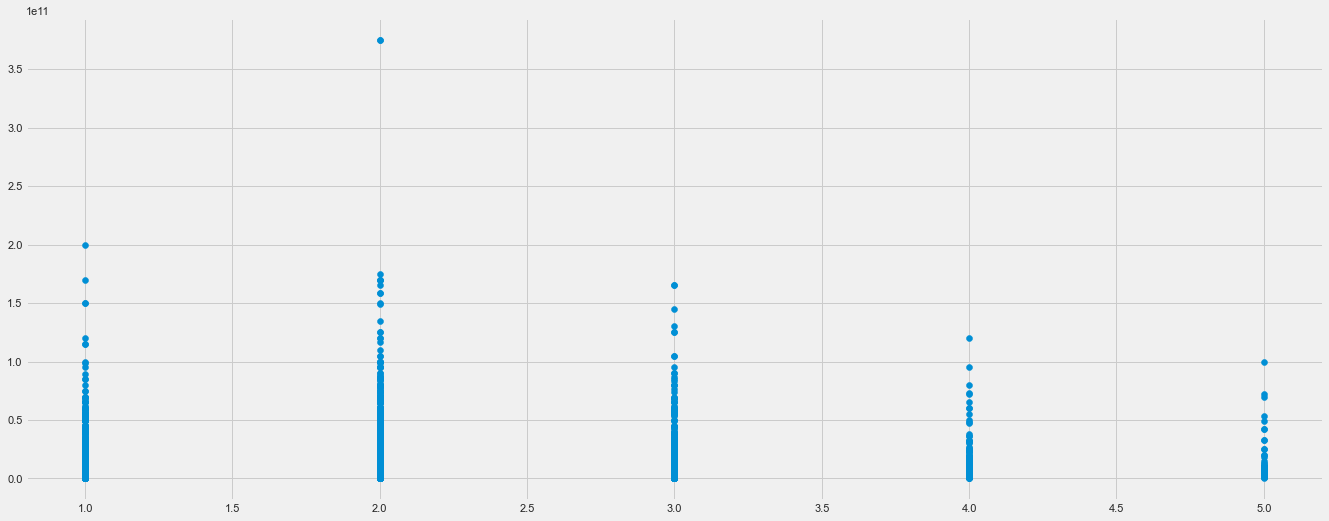

In [21]:
plt.scatter(df['jumlah_lantai'],df['harga'])

In [23]:
from scipy import stats

In [32]:
lantai = [i for i in df['jumlah_lantai'].unique()]
lantai.sort()
udah = []
pair = {}
for i in lantai:
    for j in lantai:
        if (j not in udah) & (i != j):
            ttest = stats.ttest_ind(a = df[df['jumlah_lantai'] == i]['harga'],
                                    b = df[df['jumlah_lantai'] == j]['harga'])
            p_value = ttest.pvalue
            pair[f'{i} - {j}'] = p_value
            print(i,j)
    udah.append(i)

1 2
1 3
1 4
1 5
2 3
2 4
2 5
3 4
3 5
4 5


In [33]:
count = 0
for i,j in pair.items():
    if j >= 0.05:
        count += 1
print(count, len(pair))

3 10


In [34]:
for i,j in pair.items():
    if j >= 0.05:
        print(i)

1 - 2
3 - 4
4 - 5


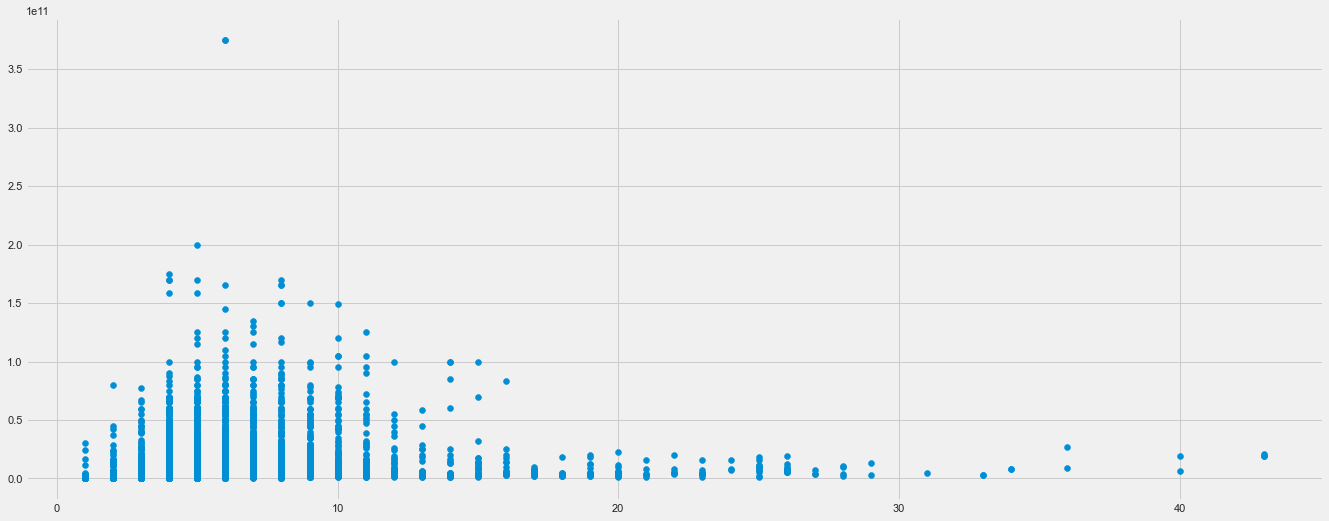

In [35]:
plt.scatter(df['kamar_tidur'],df['harga'])

In [44]:
kamar = [i for i in df['kamar_tidur'].unique()]
pair = {}
udah = []
for i in kamar:
    for j in kamar:
        if (j not in udah) & (i != j):
            ttest = stats.ttest_ind(a = df[df['kamar_tidur'] == i]['harga'],
                                    b = df[df['kamar_tidur'] == j]['harga'])
            p_value = ttest.pvalue
            pair[f'{i} - {j}'] = p_value
    udah.append(i)

/Users/rhzphlv/opt/anaconda3/lib/python3.8/site-packages/numpy/core/fromnumeric.py:3621: RuntimeWarning: Degrees of freedom <= 0 for slice
  return _methods._var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/Users/rhzphlv/opt/anaconda3/lib/python3.8/site-packages/numpy/core/_methods.py:226: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/rhzphlv/opt/anaconda3/lib/python3.8/site-packages/numpy/core/fromnumeric.py:3621: RuntimeWarning: Degrees of freedom <= 0 for slice
  return _methods._var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/Users/rhzphlv/opt/anaconda3/lib/python3.8/site-packages/numpy/core/_methods.py:226: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/rhzphlv/opt/anaconda3/lib/python3.8/site-packages/numpy/core/fromnumeric.py:3621: RuntimeWarning: Degrees of freedom <= 0 for slice
  return _methods._var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/Users/rh

In [45]:
count = 0
for i,j in pair.items():
    if j >= 0.05:
        count += 1
print(count, len(pair))

418 595


In [46]:
for i,j in pair.items():
    if j >= 0.05:
        print(i)

6 - 15
6 - 18
6 - 13
6 - 12
6 - 19
6 - 27
6 - 25
6 - 17
6 - 16
6 - 21
6 - 26
6 - 20
6 - 23
6 - 22
6 - 34
6 - 28
6 - 29
6 - 36
6 - 40
6 - 43
6 - 24
6 - 33
4 - 18
4 - 19
4 - 27
4 - 25
4 - 17
4 - 21
4 - 26
4 - 20
4 - 23
4 - 22
4 - 34
4 - 28
4 - 29
4 - 36
4 - 1
4 - 40
4 - 24
4 - 33
5 - 18
5 - 19
5 - 27
5 - 25
5 - 17
5 - 21
5 - 26
5 - 20
5 - 23
5 - 22
5 - 34
5 - 28
5 - 29
5 - 36
5 - 40
5 - 43
5 - 24
5 - 33
8 - 11
8 - 10
8 - 9
8 - 15
8 - 18
8 - 13
8 - 12
8 - 14
8 - 27
8 - 25
8 - 16
8 - 21
8 - 26
8 - 20
8 - 23
8 - 22
8 - 34
8 - 28
8 - 29
8 - 36
8 - 40
8 - 43
8 - 24
8 - 33
2 - 18
2 - 27
2 - 21
2 - 34
2 - 28
2 - 29
2 - 1
2 - 33
7 - 15
7 - 18
7 - 13
7 - 12
7 - 19
7 - 27
7 - 25
7 - 16
7 - 21
7 - 26
7 - 20
7 - 23
7 - 22
7 - 34
7 - 28
7 - 29
7 - 36
7 - 40
7 - 43
7 - 24
7 - 33
11 - 10
11 - 9
11 - 15
11 - 18
11 - 13
11 - 12
11 - 14
11 - 27
11 - 25
11 - 16
11 - 21
11 - 26
11 - 23
11 - 22
11 - 34
11 - 28
11 - 29
11 - 36
11 - 40
11 - 43
11 - 24
11 - 33
10 - 9
10 - 15
10 - 18
10 - 13
10 - 12
10 - 14
10 -

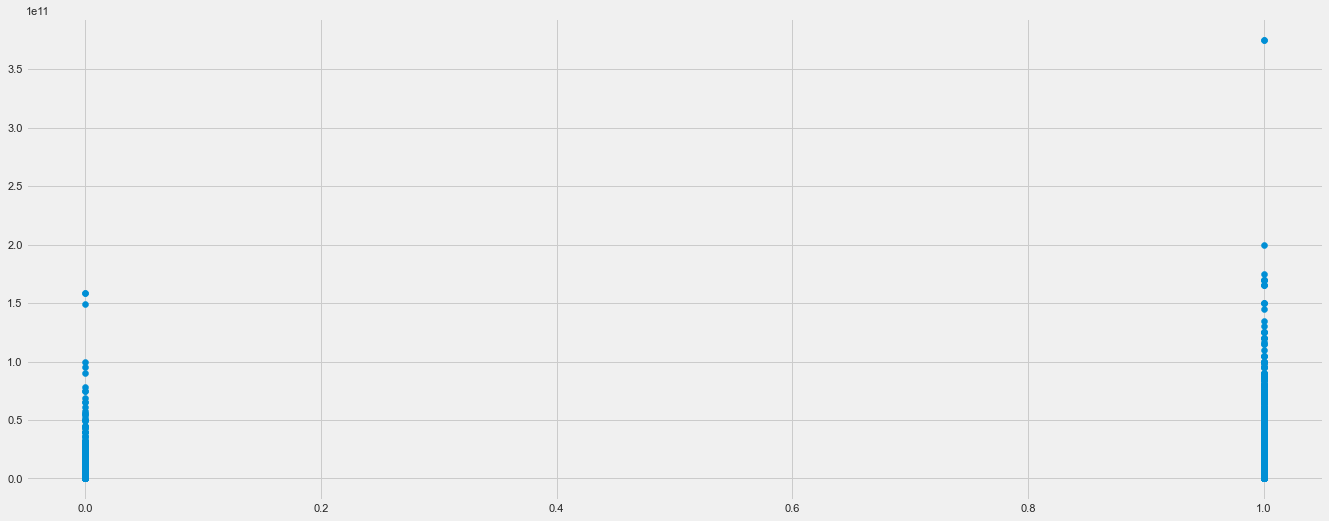

In [47]:
plt.scatter(df['garasi'],df['harga'])

In [48]:
garasi = [i for i in df['garasi'].unique()]
pair = {}
udah = []
for i in garasi:
    for j in garasi:
        if (j not in udah) & (i != j):
            ttest = stats.ttest_ind(a = df[df['garasi'] == i]['harga'],
                                    b = df[df['garasi'] == j]['harga'])
            p_value = ttest.pvalue
            pair[f'{i} - {j}'] = p_value
    udah.append(i)

In [49]:
count = 0
for i,j in pair.items():
    if j >= 0.05:
        count += 1
print(count, len(pair))

0 1


In [50]:
for i,j in pair.items():
    if j >= 0.05:
        print(i)